Importowanie potrzebnych bibliotek

In [1]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
import networkx as nx
import pylab as plt

Definiowanie struktury

In [5]:
model = BayesianNetwork([('Hp/Hd', 'D bit C on vagina'), ('Hp/Hd', 'D and C in same house'), ('Hp/Hd', 'F and C in same house'),
                        ('faeces on C underwear','RSID result on underwear'),('Background saliva on famale underwear','RSID result on underwear'),
                        ('D bit C on vagina','D saliva underwear from biting'),('D saliva underwear from biting','RSID result on underwear'),
                        ('D saliva underwear from biting','D DNA present on C underpants'),('D and C in same house','D DNA on C underwear from cohabitation'),
                        ('D DNA on C underwear from cohabitation','D DNA present on C underpants'),('F and C in same house','F DNA on C underwear from cohabitation'),
                        ('D DNA present on C underpants','Family YSTR profile present on C underwear'),('F DNA on C underwear from cohabitation','Family YSTR profile present on C underwear')])

In [2]:
# Defining Bayesian Structure
model = BayesianNetwork([('Guest', 'Host'), ('Price', 'Host')])
 
# Defining the CPDs:
cpd_guest = TabularCPD('Guest', 3, [[0.33], [0.33], [0.33]])
cpd_price = TabularCPD('Price', 3, [[0.33], [0.33], [0.33]])
cpd_host = TabularCPD('Host', 3, [[0, 0, 0, 0, 0.5, 1, 0, 1, 0.5],
                            [0.5, 0, 1, 0, 0, 0, 1, 0, 0.5],
                            [0.5, 1, 0, 1, 0.5, 0, 0, 0, 0]],
                  evidence=['Guest', 'Price'], evidence_card=[3, 3])
 
# Associating the CPDs with the network structure.
model.add_cpds(cpd_guest, cpd_price, cpd_host)

In [3]:
model.check_model()

True

In [4]:
# Infering the posterior probability
from pgmpy.inference import VariableElimination
 
infer = VariableElimination(model)
posterior_p = infer.query(['Host'], evidence={'Guest': 2, 'Price': 2})
print(posterior_p)


0it [00:00, ?it/s]

0it [00:00, ?it/s]

+---------+-------------+
| Host    |   phi(Host) |
+=========+=============+
| Host(0) |      0.5000 |
+---------+-------------+
| Host(1) |      0.5000 |
+---------+-------------+
| Host(2) |      0.0000 |
+---------+-------------+


StopIteration: 

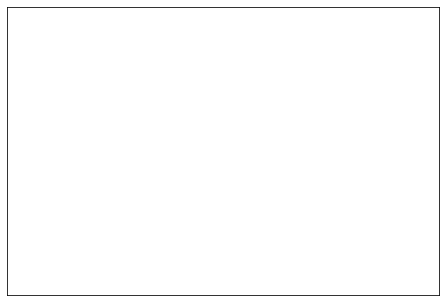

In [7]:
model = BayesianNetwork([('Guest', 'Host'), ('Price', 'Host')])
nx.draw(model, with_labels=True)


Definiowane CPD

In [ ]:
cpd_hphd = TabularCPD('Hp/Hd', 3, [[0.33], [0.33], [0.33]])
cpd_price = TabularCPD('Price', 3, [[0.33], [0.33], [0.33]])
cpd_host = TabularCPD('Host', 3, [[0, 0, 0, 0, 0.5, 1, 0, 1, 0.5],
                            [0.5, 0, 1, 0, 0, 0, 1, 0, 0.5],
                            [0.5, 1, 0, 1, 0.5, 0, 0, 0, 0]],
                  evidence=['Guest', 'Price'], evidence_card=[3, 3])